In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/adbir/Data Science/Football score prediction/results.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41640 non-null  object
 1   home_team   41640 non-null  object
 2   away_team   41640 non-null  object
 3   home_score  41640 non-null  int64 
 4   away_score  41640 non-null  int64 
 5   tournament  41640 non-null  object
 6   city        41640 non-null  object
 7   country     41640 non-null  object
 8   neutral     41640 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [20]:
data.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
0,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873,England,Scotland,4,2,Friendly,London,England,False,6
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3


In [3]:
data.describe()

,home_score,away_score
count,41640.000000,41640.000000
mean,1.744813,1.187680
std,1.753365,1.404828
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [6]:
import numpy as np
data.loc[[np.argmax(data.total_goals)]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31


([<matplotlib.axis.XTick at 0x232fb4f7430>,
 <a list of 18 Text major ticklabel objects>)

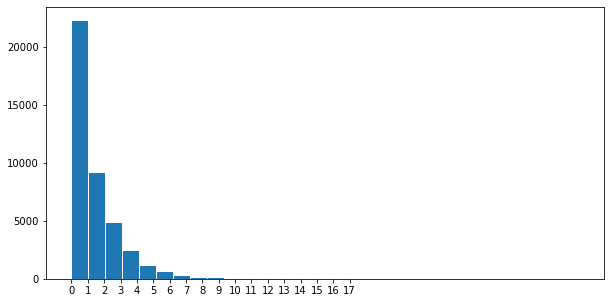

In [2]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.home_score,bins=30,edgecolor='white')
plt.xticks(range(18))

In [ ]:
#data.drop('Total_goals',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x2c0a9771340>,
 <a list of 20 Text major ticklabel objects>)

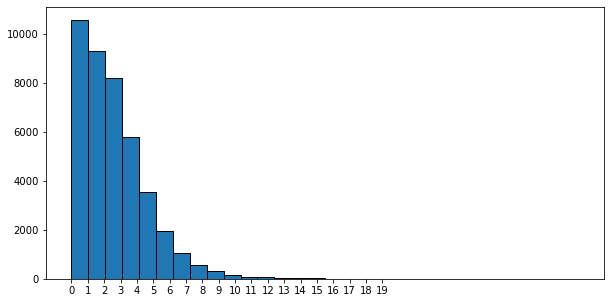

In [6]:
#most probable total goals in a match
import matplotlib.pyplot as plt
data['total_goals']=data['home_score']+data['away_score']
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.total_goals,bins=30,edgecolor='black')
plt.xticks(range(20))

In [2]:
data['date']=data['date'].apply(lambda x : int(str.split(x,'-')[0]))
data['date'].value_counts()
data['date'].min()

1872

([<matplotlib.axis.XTick at 0x2c4cdb32850>,
 <a list of 20 Text major ticklabel objects>)

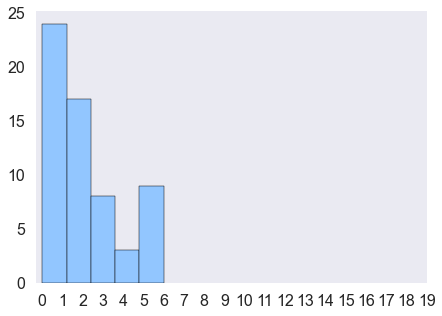

In [72]:
# most probable total goals
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
data['total_goals']=data['home_score']+data['away_score']
style.use('seaborn-poster')
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
plt.hist(data.loc[(data['date']>2019)].total_goals,bins=5,
         edgecolor='black')
plt.xticks(range(20))

In [56]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [67]:
rec_data=data.loc[(data['date']>=2000)]
rec_data.iloc[[rec_data.total_goals.argmax()]]
print(rec_data.total_goals.mean())

2.744112130054189


In [106]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
#lam =2.74
from scipy.special import factorial
import numpy as np
#k is no. of event we want to find the probability of

def poisson(k,exp_events):
    minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f}%.')
    return p_k

In [68]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.74)*100)
    k.append(i)


The probability of 0 goals in 90 minutes is 6.46%.
The probability of 1 goals in 90 minutes is 17.69%.
The probability of 2 goals in 90 minutes is 24.24%.
The probability of 3 goals in 90 minutes is 22.14%.
The probability of 4 goals in 90 minutes is 15.16%.
The probability of 5 goals in 90 minutes is 8.31%.
The probability of 6 goals in 90 minutes is 3.79%.
The probability of 7 goals in 90 minutes is 1.49%.
The probability of 8 goals in 90 minutes is 0.51%.
The probability of 9 goals in 90 minutes is 0.15%.


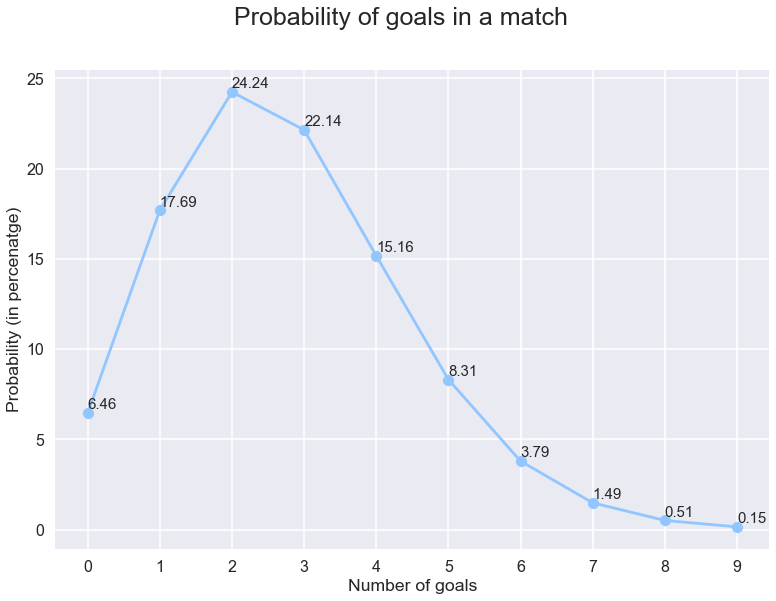

In [100]:

fig = plt.figure()
plt.plot(k,p_k,'o-')
plt.xticks(range(10))
fig.suptitle('Probability of goals in a match',fontsize=25)
plt.xlabel('Number of goals')
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,p_k):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

                  0
count  10000.000000
mean       2.867400
std        1.690119
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000


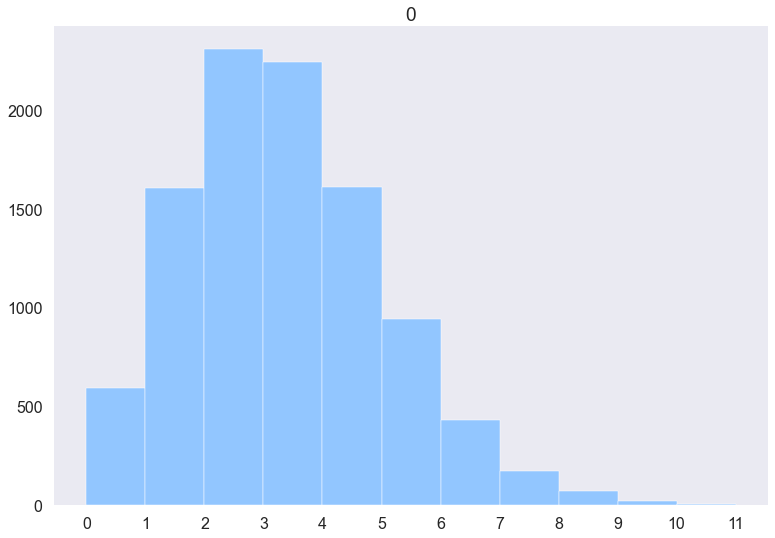

In [101]:
# In 10000 matches simulation goals scored distribution
N=10000
lam=2.74
counts=np.random.poisson(lam,size=N)
df=pd.DataFrame(counts)
print (df.describe())
#print(df[0].value_counts())
df.hist(bins=11,edgecolor='white')
plt.xticks(range(12))
plt.grid(False)

In [19]:
#p_n = poisson(np.arange(100),5)

In [111]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of {n_query} or fewer goals in 1 game: {100*p:.2f}%.')
    
def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'Probability of more than {n_query} goals in 1 game: {100*p:.2f}%.')
        


In [112]:
#probability of scoring more or fewer goals than a particular no.
#p_lessorequal(4,2.87,False)
for i in range(1,10):
    p_greaterorequal(i,2.74,False)

Probability of more than 1 goals in 1 game: 75.85%.
Probability of more than 2 goals in 1 game: 51.61%.
Probability of more than 3 goals in 1 game: 29.47%.
Probability of more than 4 goals in 1 game: 14.31%.
Probability of more than 5 goals in 1 game: 6.00%.
Probability of more than 6 goals in 1 game: 2.21%.
Probability of more than 7 goals in 1 game: 0.72%.
Probability of more than 8 goals in 1 game: 0.21%.
Probability of more than 9 goals in 1 game: 0.06%.


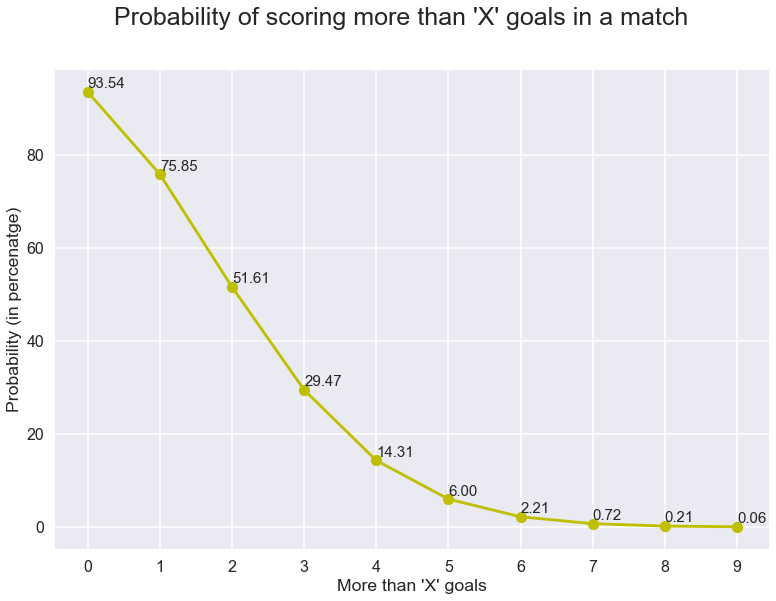

In [162]:
prob=[]
for i in range(10):
    p = p_greaterorequal(i,2.74,True)
    prob.append(p*100)
fig = plt.figure()
plt.plot(k,prob,'o-y')
plt.xticks(range(10))
fig.suptitle("Probability of scoring more than 'X' goals in a match",fontsize=25)
plt.xlabel("More than 'X' goals")
plt.ylabel('Probability (in percenatge)')
for x,y in zip(k,prob):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',fontsize=15)
plt.grid(True)

# If we switch on to tv at a  random time, then the average time we have to wait to see a goal

In [118]:
events_per_min=(2.74/90)
np.random.seed(42)
events = np.random.choice([0,1],size=100000,
                          replace=True,
                          p=[1-events_per_min,events_per_min])
success_times = np.where(events==1)[0]
waiting_times = np.diff(success_times)
waiting_times[:10]

array([39, 19, 70, 15, 72, 35, 44, 85, 51,  5], dtype=int64)

In [119]:
def plot_hist_waiting_time(x):
    df = pd.DataFrame(x)
    df.hist(bins=100)

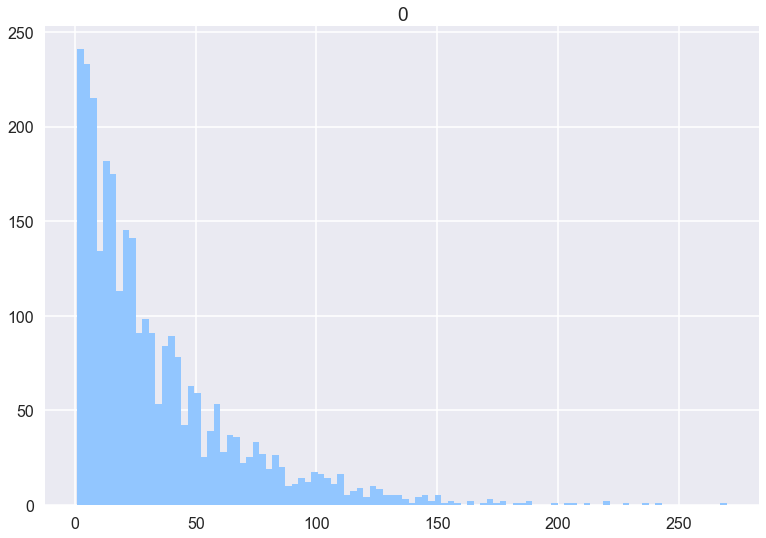

In [120]:
plot_hist_waiting_time(waiting_times)

In [122]:
#Simulating avg time for 10000 matches to get the actual average time
avg = []
events_per_minute=(2.74/90)
for i in range(10000):
    avg.append(np.mean(np.diff(np.where(np.random.choice([0, 1], size = 100000, replace=True, 
                          p=[1-events_per_minute, events_per_minute]) == 1)[0])))

                  0
count  10000.000000
mean      32.847877
std        0.591568
min       30.767241
25%       32.442206
50%       32.836674
75%       33.242182
max       35.058576


<Figure size 921.6x633.6 with 0 Axes>

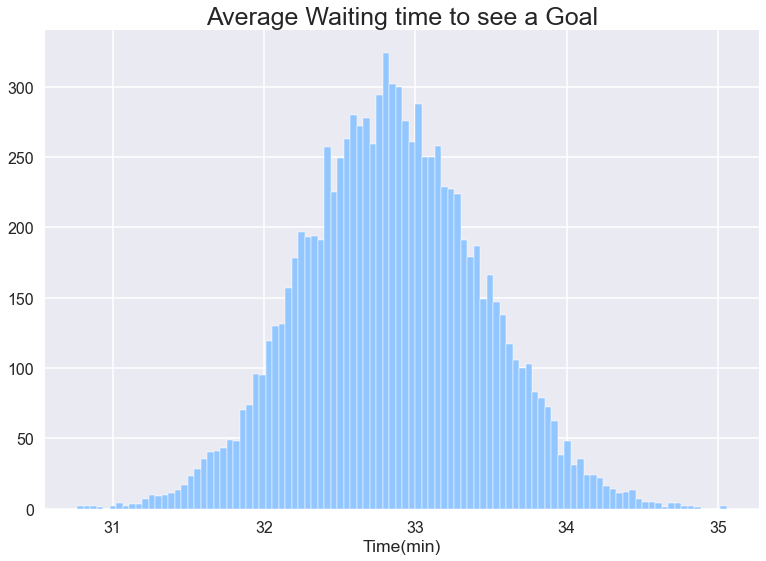

In [133]:
df= pd.DataFrame(avg)
print(df.describe())
fig = plt.figure()
df.hist(bins=100,edgecolor='white')
plt.title('Average Waiting time to see a Goal',fontsize=25)
plt.xlabel('Time(min)')
plt.grid(True)

# predicting scores by poisson

In [12]:
len(data[(data.home_team =='England') & (data.away_team =='France')])

13

In [3]:
data['home_team'] = data['home_team'].apply(lambda x: (''.join(x.split())).lower())
data['away_team'] = data['away_team'].apply(lambda x: (''.join(x.split())).lower())

In [37]:
import numpy as np
from scipy import stats
counts = np.random.poisson(2.87,10)
print(int(stats.mode(counts)[0]))

2


In [7]:
import pandas as pd
import numpy as np
from scipy import stats 

def PredictScore():
    
    home_team = input("Enter Home Team: ")
    ht = (''.join(home_team.split())).lower()
    away_team = input("Enter Away Team: ")
    at = (''.join(away_team.split())).lower()
    
    if len(data[(data.home_team ==ht) & (data.away_team ==at)]) > 20:
        
        avg_home_score = data[(data.home_team ==ht) & (data.away_team ==at)].home_score.mean()
        avg_away_score = data[(data.home_team ==ht) & (data.away_team ==at)].away_score.mean()
        
        home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])                    
        away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
        
    else:
        avg_home_goal_conceded = data[(data.home_team ==ht)].away_score.mean()
        avg_away_goal_scored   = data[(data.away_team ==at)].away_score.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])
        
        avg_away_goal_conceded = data[(data.home_team ==at)].home_score.mean()
        avg_home_goal_scored   = data[(data.away_team ==ht)].home_score.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])
    
    avg_total_score = int(stats.mode(
        np.random.poisson((data[(data.home_team ==ht) & (data.away_team ==at)].total_goals.mean()),100000))[0])
    
    print(f'Expected total goals are {avg_total_score}')
    print(f'They have played {len(data[(data.home_team ==ht) & (data.away_team ==at)])} matches')
    print(f'The scoreline is {home_team} {home_goal}:{away_goal} {away_team}')

In [8]:
PredictScore()

Enter Home Team: brazil
Enter Away Team: mexico
Expected total goals are 2
They have played 23 matches
The scoreline is brazil 2:0 mexico


In [91]:
#Search in google: "last match between {home_team vs {away_team}}"